<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysisPt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS 3**

## **0 Inizializzazione**

In [46]:
import networkx as nx
import pandas as pd
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
from networkx.algorithms import community
from networkx.algorithms.community.label_propagation import label_propagation_communities
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [4]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [5]:
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]

def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(G, source, target))
    return graph.subgraph(nodes)

## **4 Communities**

### **4.1 Girvan-Newman Comunities**

In [6]:
girvan_newman_communities = list(girvan_newman(G))

In [42]:
#stessa cosa di sopra ma senza list
clusters = girvan_newman(G)
clusters

<generator object girvan_newman at 0x7f5666a9c740>

In [7]:
print(f"Numero di cluster: {len(girvan_newman_communities)}")
for i, cluster in enumerate(girvan_newman_communities):
    print(f"Cluster {i+1}: {cluster}")

Numero di cluster: 197
Cluster 1: ({'20', '71', '171', '129', '190', '50', '22', '60', '68', '43', '120', '100', '92', '156', '195', '17', '8', '29', '135', '121', '49', '181', '194', '164', '42', '51', '24', '1', '148', '14', '86', '75', '39', '189', '47', '198', '72', '66', '52', '137', '116', '89', '82', '18', '5', '15', '103', '145', '157', '37', '168', '183', '12', '81', '56', '62', '25', '76', '28', '65', '69', '95', '126', '61', '35', '10', '2', '67', '130', '138', '144', '90', '175', '152', '58', '197', '122', '73', '139', '136', '19', '63', '31', '162', '32', '101', '124', '96', '54', '11', '180', '125', '88', '112', '87', '110', '44', '45', '64', '127', '105', '109', '160', '117', '173', '13', '147', '55', '184', '7', '70', '178', '84', '85', '53', '143', '21', '187', '111', '118', '16', '165', '98', '123', '161', '186', '107', '170', '36', '167', '6', '193', '185', '128', '151', '142', '48', '114', '163', '23', '176', '38', '166', '188', '150', '94', '158', '146', '192', '15

<Axes: title={'center': 'Girvan-Newman Community Detection Modularity Trend'}, xlabel='k'>

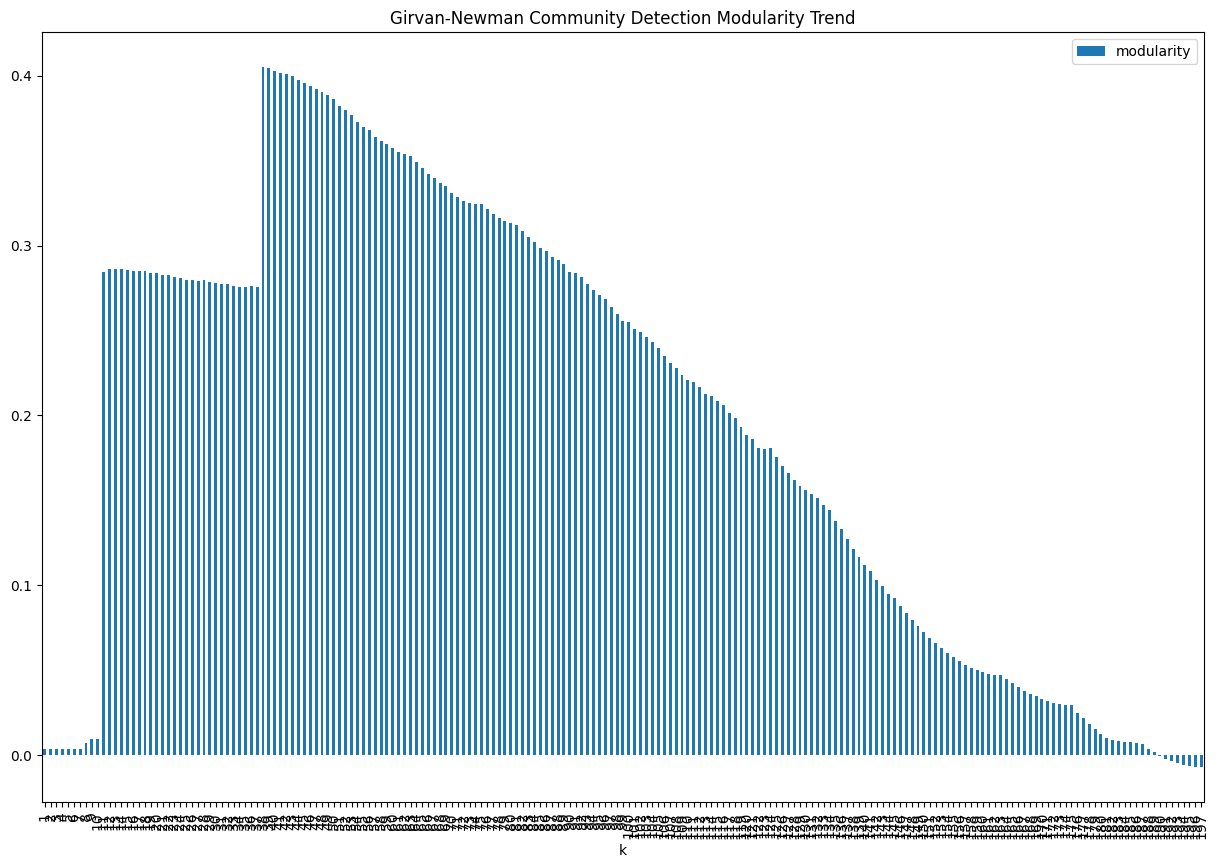

In [13]:
modularity_df = pd.DataFrame([[k+1, round(nx_comm.modularity(G, girvan_newman_communities[k]), 6)]
                for k in range(len(girvan_newman_communities))], columns=["k", "modularity"])
modularity_df.plot.bar(x="k", figsize=(15,10), title="Girvan-Newman Community Detection Modularity Trend")

<Figure size 3500x1000 with 0 Axes>

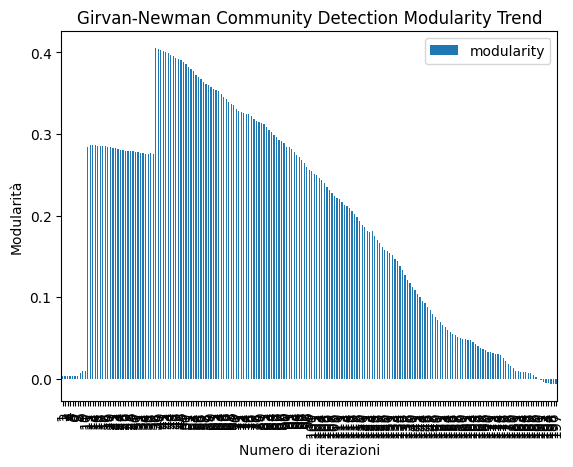

In [14]:
# Calcola l'indice di modularità per ogni passo dell'algoritmo
modularity_scores = [(k+1, round(nx.algorithms.community.modularity(G, communities), 6))
                     for k, communities in enumerate(girvan_newman_communities)]

# Crea un DataFrame con i valori di modularità
modularity_df = pd.DataFrame(modularity_scores, columns=["k", "modularity"])

# Crea il grafico a barre
plt.figure(figsize=(35, 10))
modularity_df.plot.bar(x="k", y="modularity", title="Girvan-Newman Community Detection Modularity Trend")
plt.xlabel("Numero di iterazioni")
plt.ylabel("Modularità")
plt.show()

In [ ]:
for i, cluster in enumerate(girvan_newman_communities):
    print(f"Cluster {i+1}: {cluster}")

In [44]:
index = modularity_scores.index(max(modularity_scores))
print(index)
i=0
for v in girvan_newman_communities:
    if i==index:
        #print(v)
        print(f"Cluster {i+1}: {v}")
        temp = v
    i+=1

196
Cluster 197: ({'1'}, {'10'}, {'11'}, {'12'}, {'13'}, {'14'}, {'15'}, {'16'}, {'17'}, {'18'}, {'19'}, {'2'}, {'20'}, {'21'}, {'22'}, {'23'}, {'24'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7'}, {'8'}, {'9'}, {'120'}, {'121'}, {'122'}, {'123'}, {'124'}, {'125'}, {'67'}, {'130'}, {'145'}, {'146'}, {'147'}, {'148'}, {'149'}, {'150'}, {'157'}, {'159'}, {'160'}, {'101'}, {'112'}, {'128'}, {'133'}, {'137'}, {'152'}, {'164'}, {'165'}, {'166'}, {'167'}, {'168'}, {'169'}, {'170'}, {'171'}, {'172'}, {'173'}, {'174'}, {'177'}, {'178'}, {'179'}, {'153'}, {'155'}, {'100'}, {'102'}, {'103'}, {'104'}, {'105'}, {'106'}, {'107'}, {'108'}, {'109'}, {'110'}, {'111'}, {'116'}, {'117'}, {'118'}, {'119'}, {'127'}, {'138'}, {'139'}, {'140'}, {'154'}, {'191'}, {'26'}, {'27'}, {'28'}, {'48'}, {'54'}, {'55'}, {'74'}, {'75'}, {'76'}, {'80'}, {'81'}, {'83'}, {'84'}, {'85'}, {'86'}, {'87'}, {'89'}, {'90'}, {'92'}, {'93'}, {'95'}, {'96'}, {'97'}, {'98'}, {'91'}, {'94'}, {'134'}, {'192'}, {'114'}, {'158'}, {'88'}, {'187'},

In [47]:
community.greedy_modularity_communities(G)

[frozenset({'1',
            '10',
            '101',
            '11',
            '112',
            '12',
            '121',
            '126',
            '127',
            '128',
            '129',
            '13',
            '130',
            '131',
            '133',
            '135',
            '136',
            '137',
            '14',
            '145',
            '146',
            '147',
            '148',
            '149',
            '15',
            '150',
            '151',
            '152',
            '153',
            '158',
            '159',
            '16',
            '160',
            '164',
            '165',
            '166',
            '167',
            '168',
            '169',
            '17',
            '170',
            '171',
            '172',
            '173',
            '174',
            '175',
            '176',
            '177',
            '178',
            '179',
            '18',
            '19',
            '192',
     

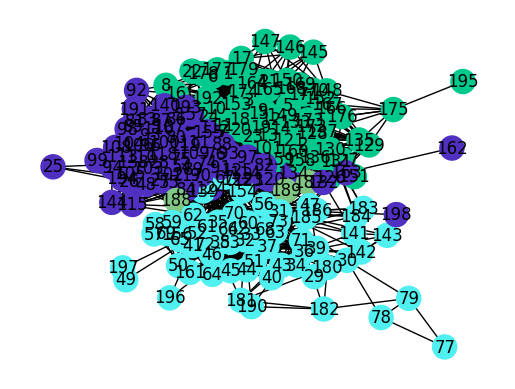

In [51]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0", "#81C784"]
pos = nx.kamada_kawai_layout(G)
lst_b = community.greedy_modularity_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [36]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD", "#EF9A9A", "#B9EF9A"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [32]:
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Visualizzazione di {len(communities)} communities con modularity: {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.figure(1,figsize=(20,10)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

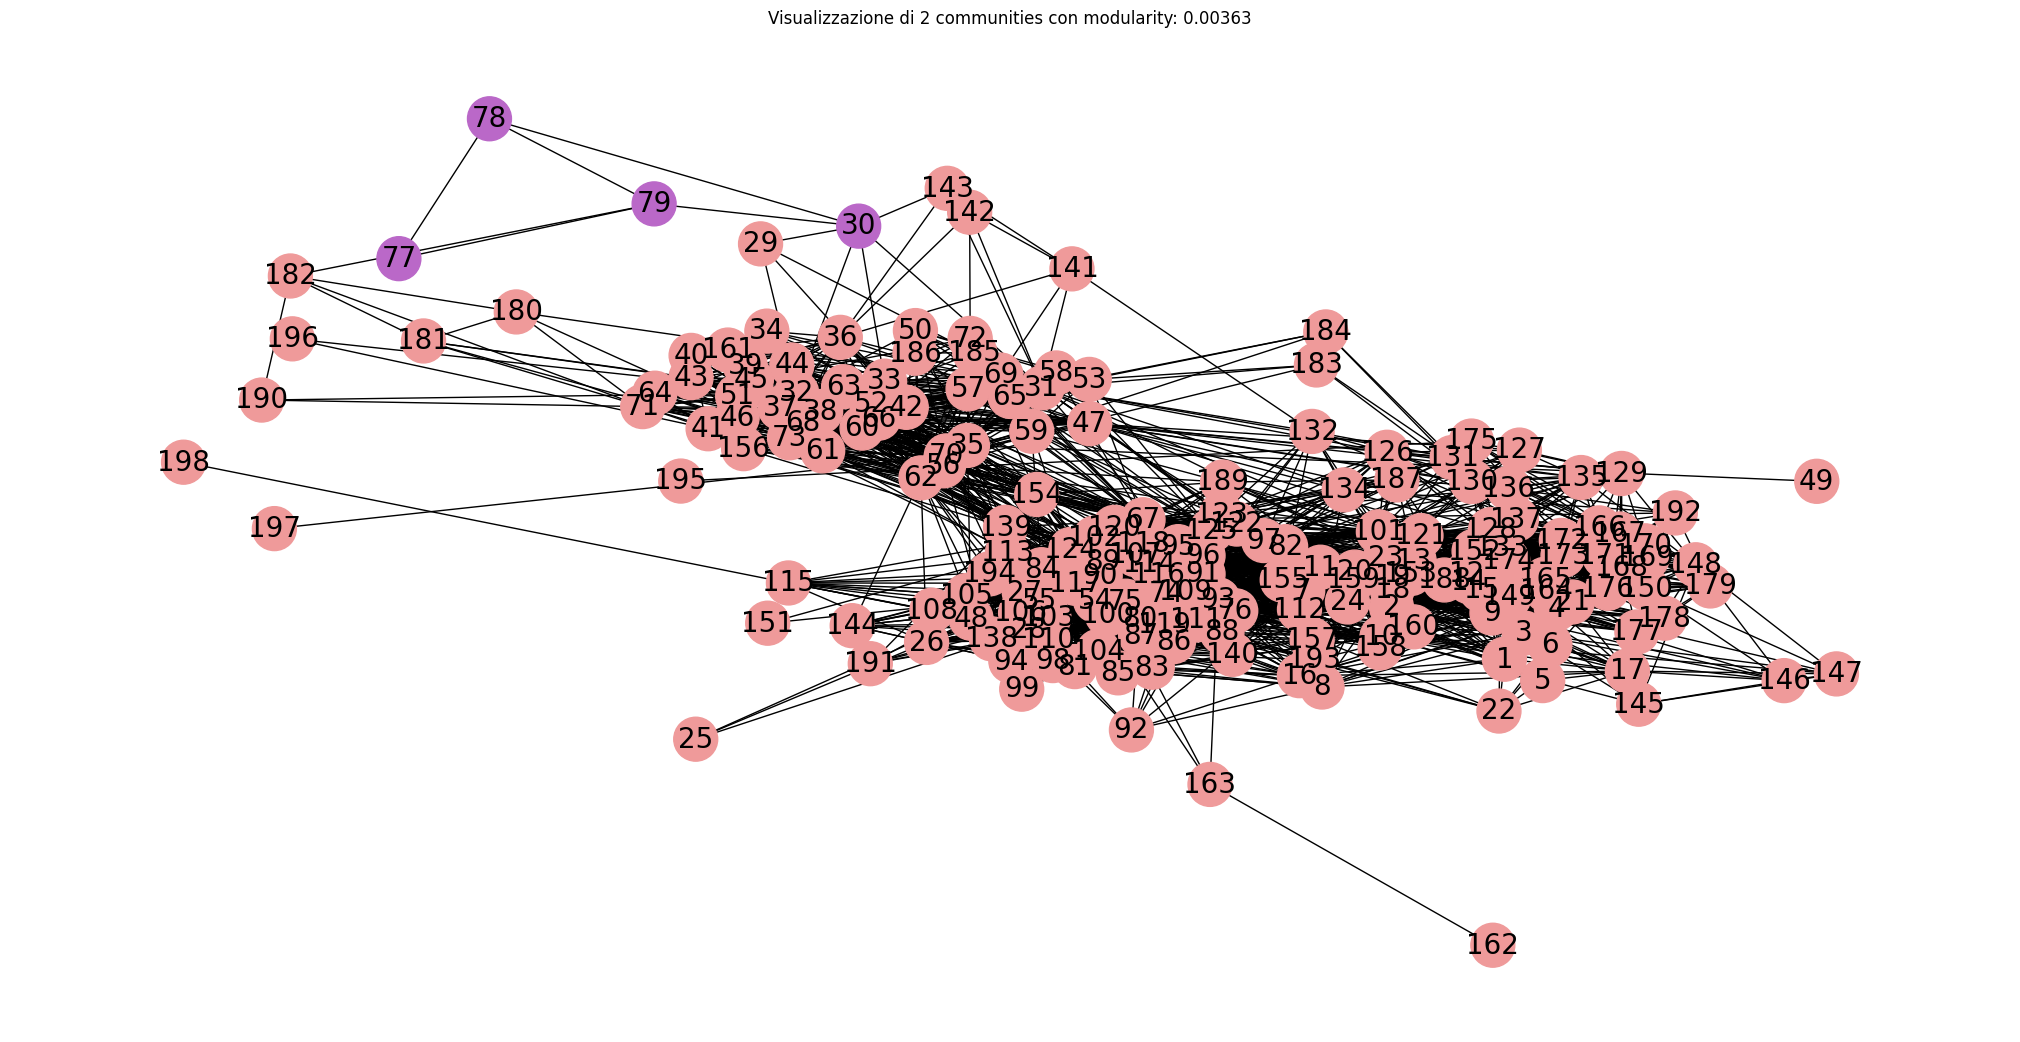

In [33]:
visualize_communities(G, girvan_newman_communities[0])

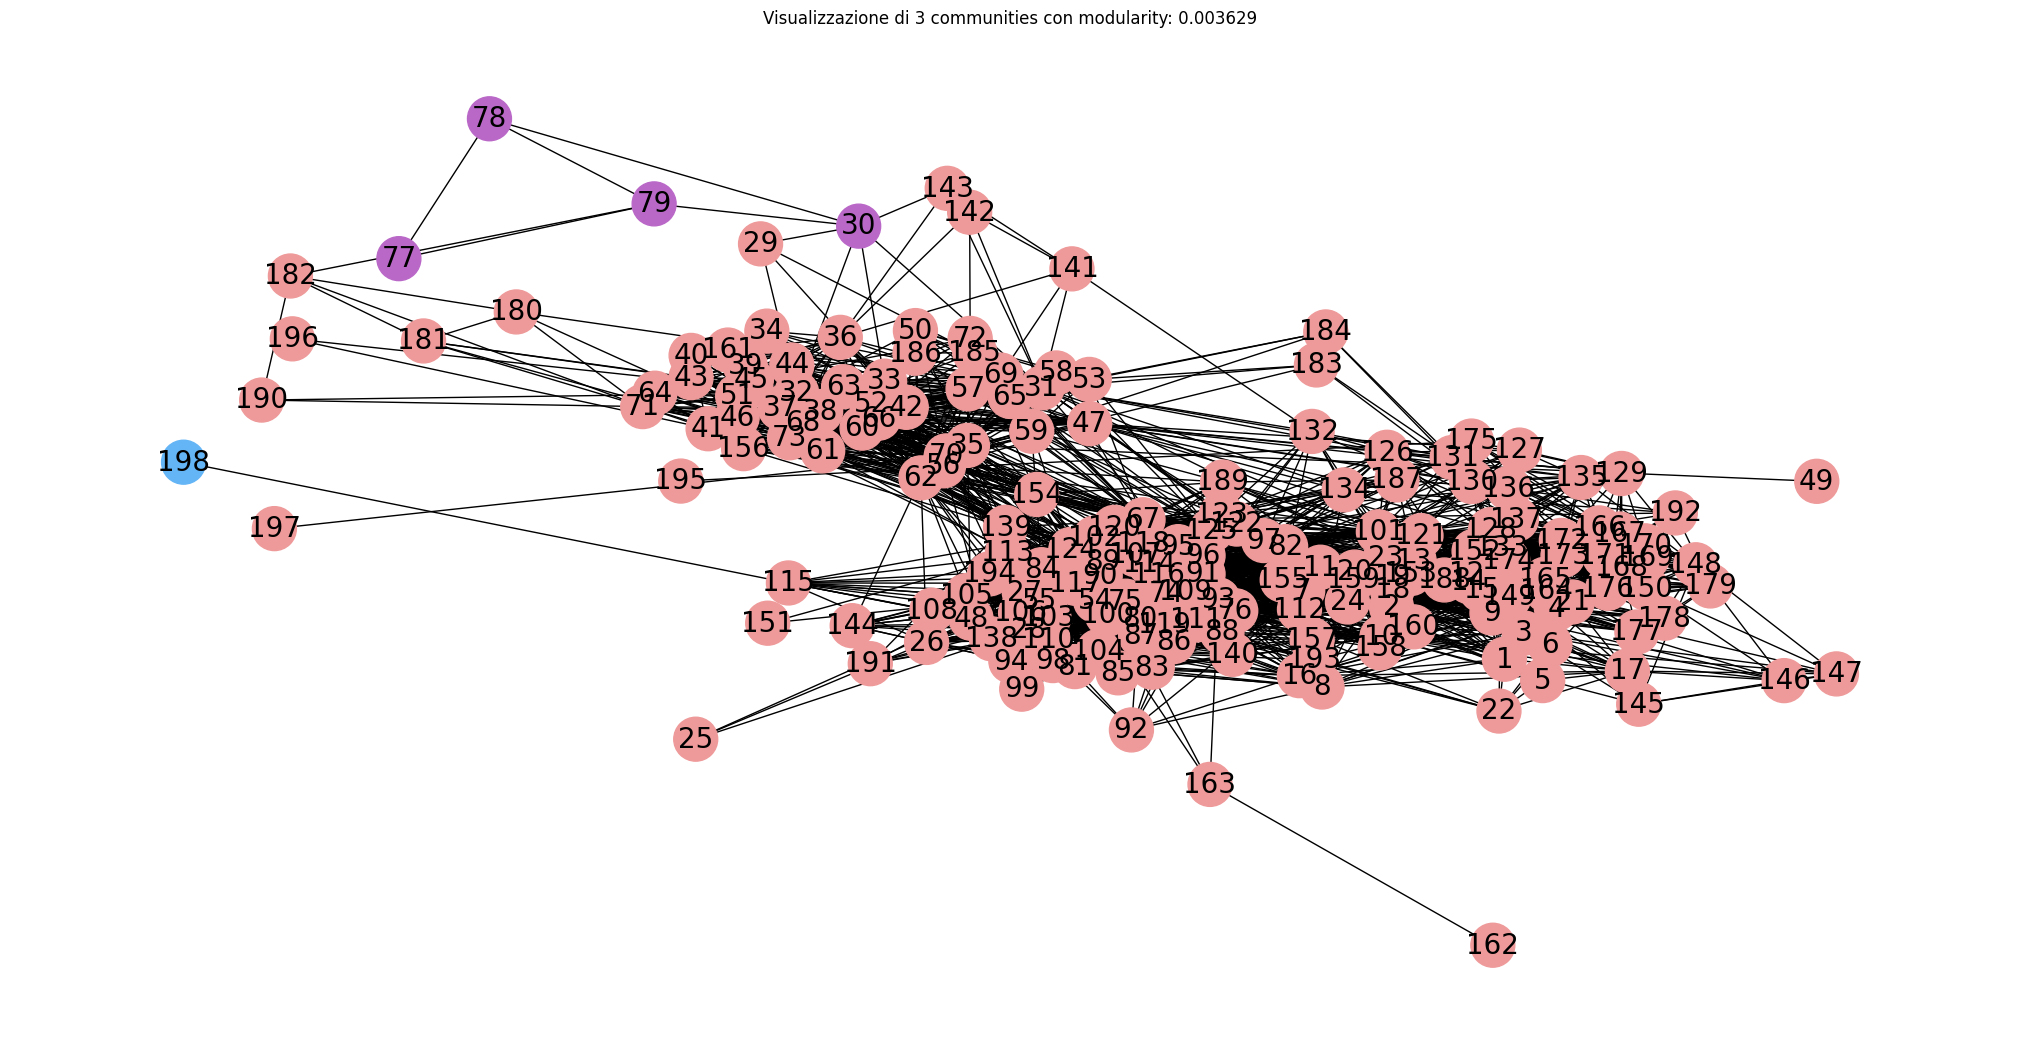

In [28]:
visualize_communities(G, girvan_newman_communities[1])

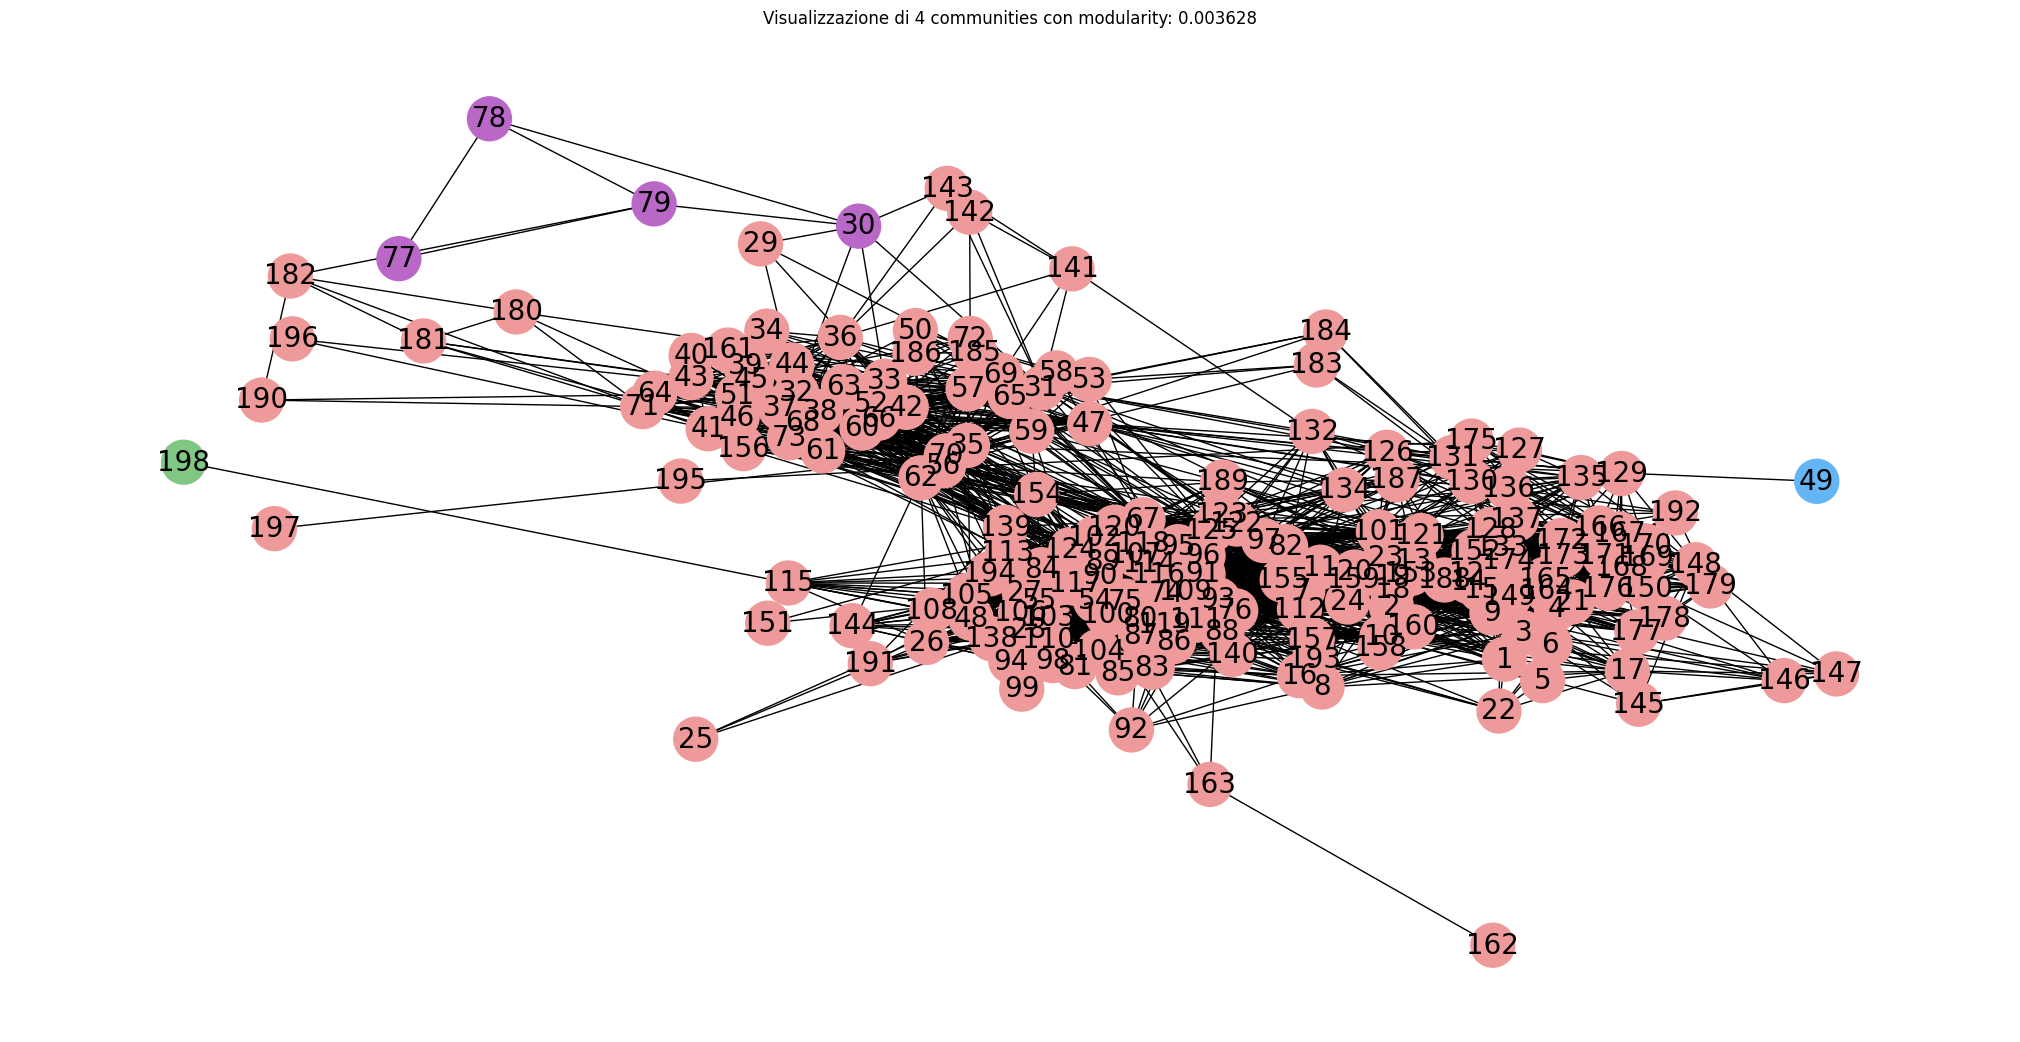

In [29]:
visualize_communities(G, girvan_newman_communities[2])

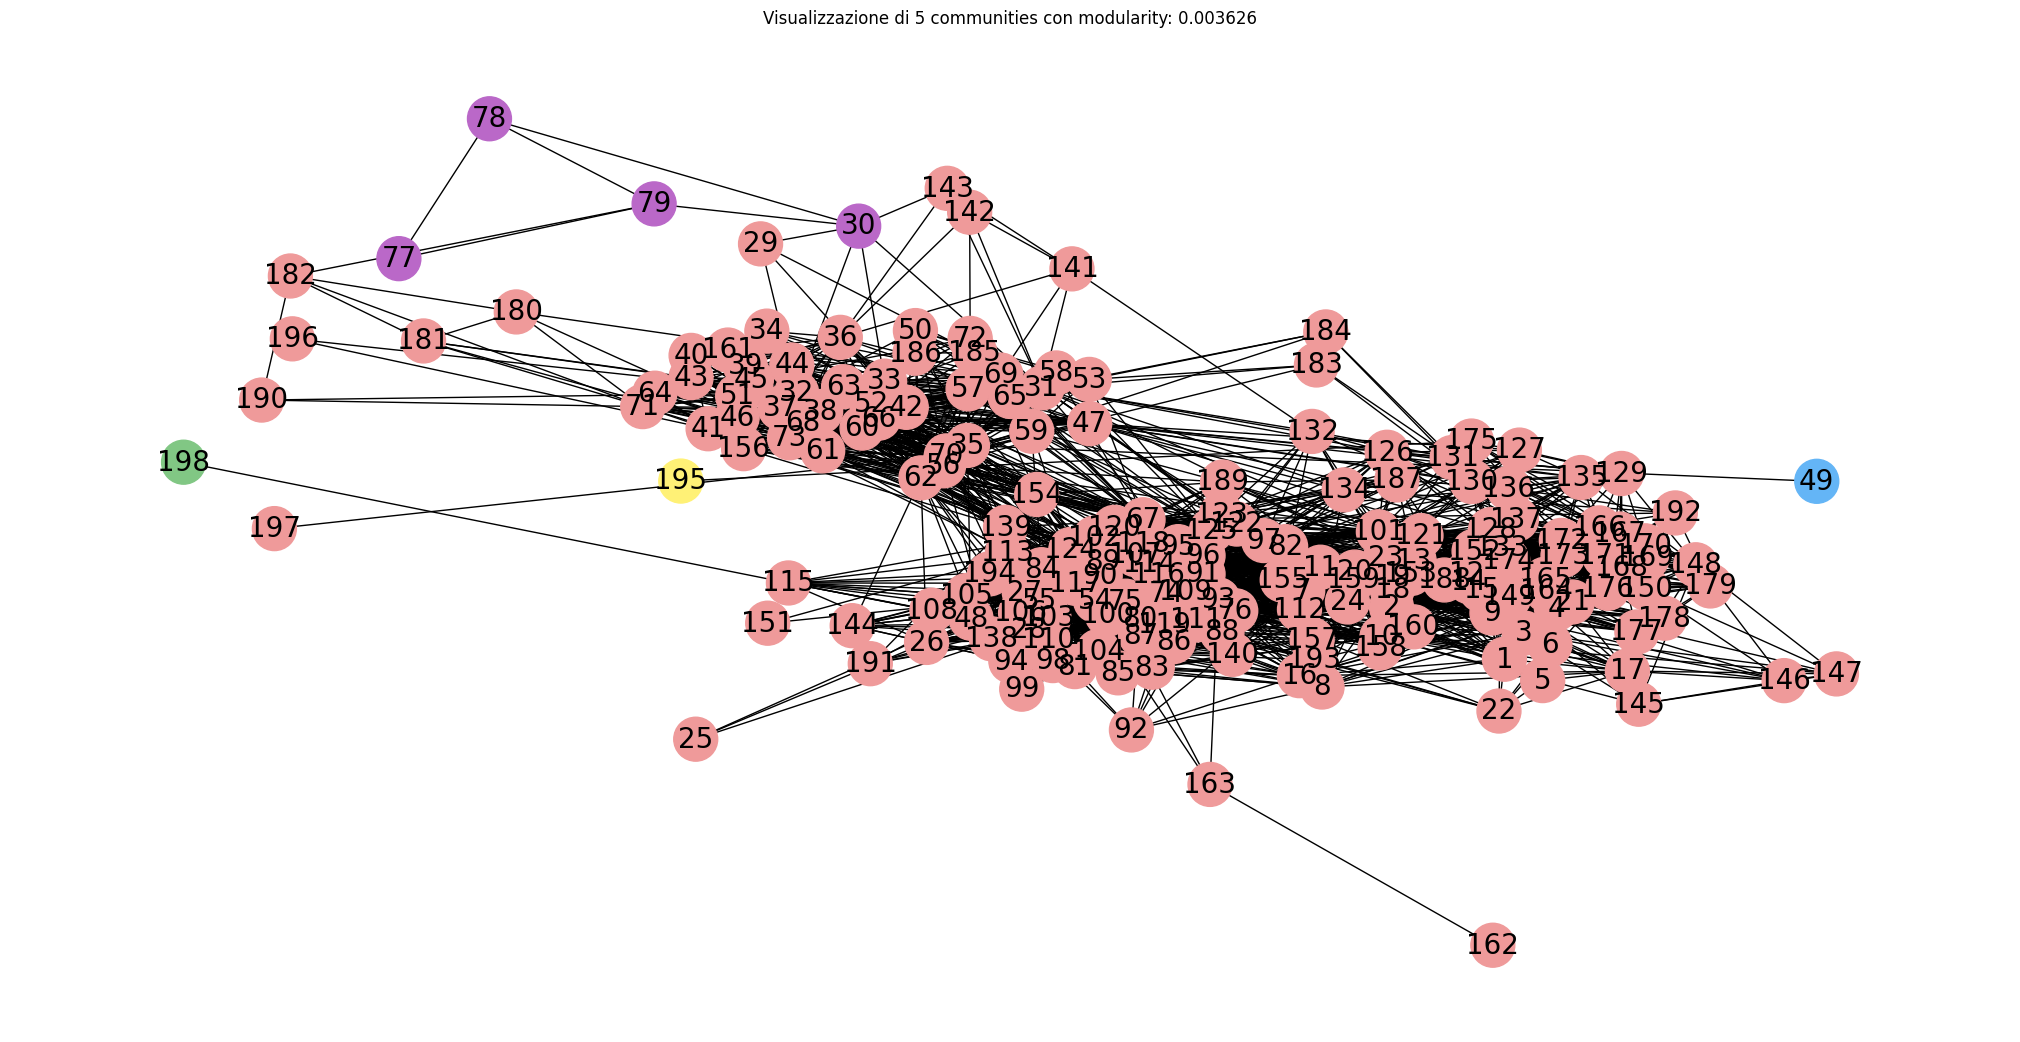

In [30]:
visualize_communities(G, girvan_newman_communities[3])

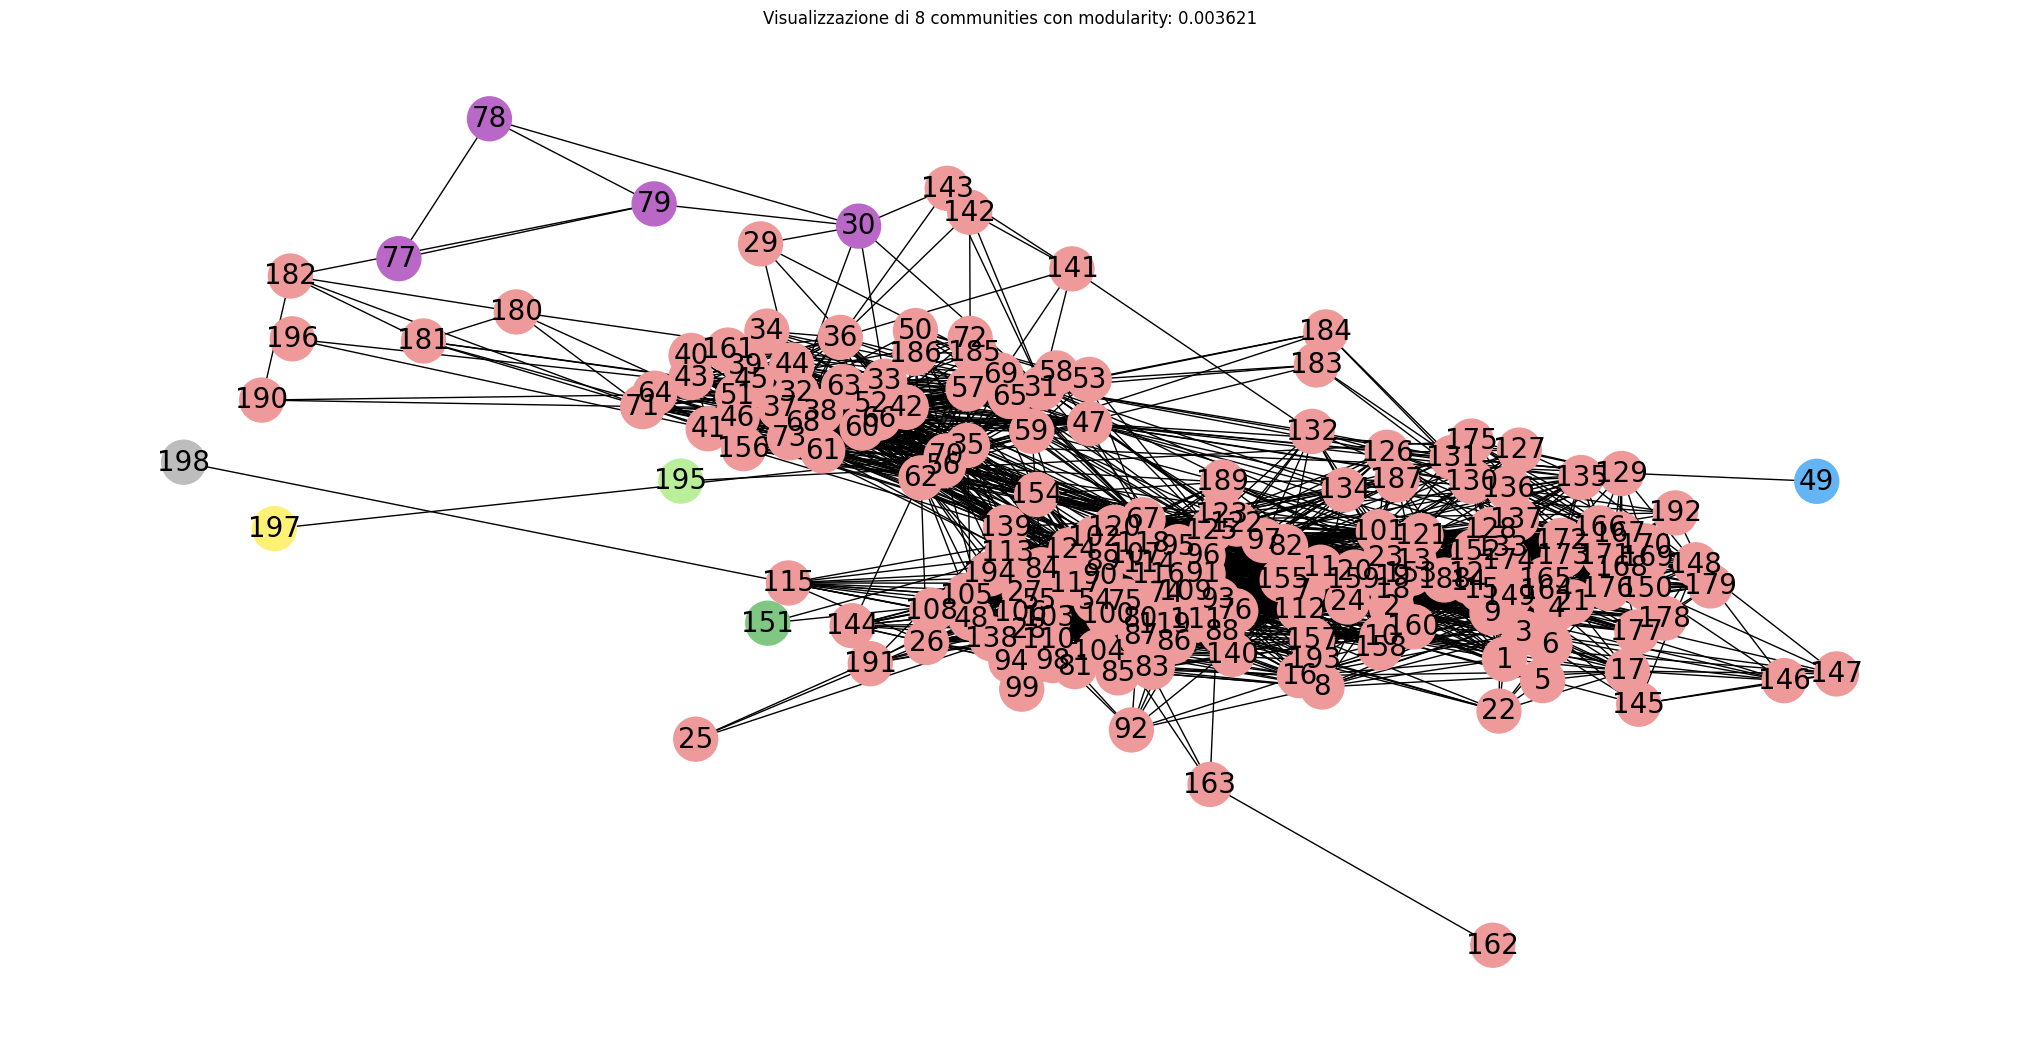

In [37]:
visualize_communities(G, girvan_newman_communities[6])

### **4.2 Label Propagation**

Generazione etichette di comunità propagandole attraverso la rete in base all'etichetta più frequente.

Come fare:
Passo 1: dopo aver inizializzato ogni nodo con un'etichetta univoca, l'algoritmo imposta ripetutamente l'etichetta di un nodo per essere l'etichetta che appare più frequentemente tra i vicini di quel nodo.
Passo 2: l'algoritmo si interrompe quando ogni nodo ha l'etichetta che appare più frequentemente tra i suoi vicini. L'algoritmo è asincrono perché ogni nodo viene aggiornato senza attendere gli aggiornamenti degli altri nodi.

Svantaggi:

L'inizializzazione casuale può portare a partizioni senza soluzione univoca, ma l'implementazione di NetworkX ha uno stato casuale fisso in modo che l'output sia riproducibile.

In [ ]:
label_prop_communities = list(label_propagation_communities(G))
label_prop_communities

[{'1',
  '10',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '11',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '12',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '129',
  '13',
  '130',
  '131',
  '132',
  '133',
  '134',
  '135',
  '136',
  '137',
  '138',
  '139',
  '14',
  '140',
  '144',
  '145',
  '146',
  '147',
  '148',
  '149',
  '15',
  '150',
  '151',
  '152',
  '153',
  '154',
  '155',
  '157',
  '158',
  '159',
  '16',
  '160',
  '162',
  '163',
  '164',
  '165',
  '166',
  '167',
  '168',
  '169',
  '17',
  '170',
  '171',
  '172',
  '173',
  '174',
  '175',
  '176',
  '177',
  '178',
  '179',
  '18',
  '187',
  '188',
  '189',
  '19',
  '191',
  '192',
  '193',
  '194',
  '195',
  '198',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '3',
  '4',
  '48',
  '5',
  '54',
  '55',
  '6',
  '67',
  '7',
  '74',
  '

A differenza di Girvan-Newman, non puoi controllare quanti insiemi o iterazioni. Abbiamo ottenuto 3 comunità identificate dall'algoritmo di rilevamento delle comunità di propagazione dell'etichetta. Visualizziamolo con la mia funzione definita in precedenza.

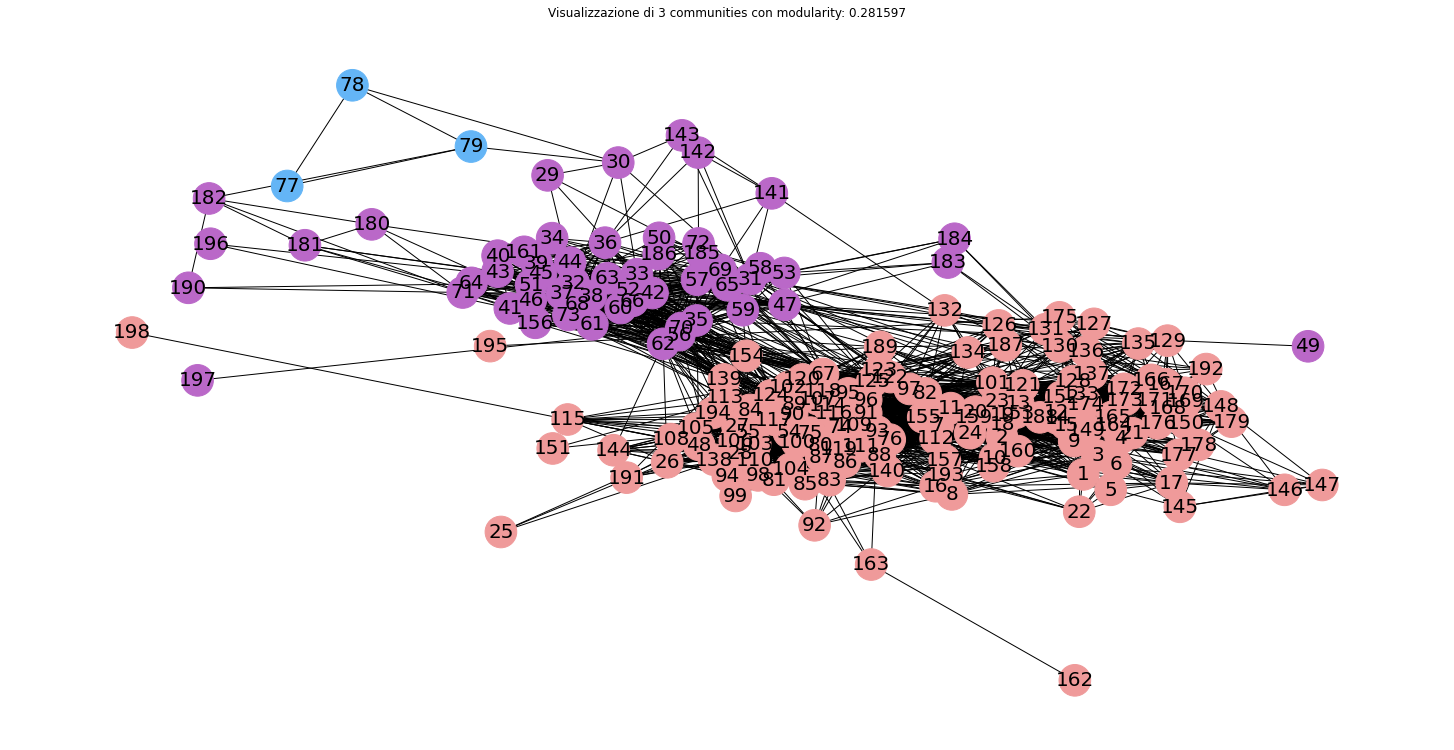

In [ ]:
visualize_communities(G, label_prop_communities)

In [ ]:
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Divisione in sottografi delle Communities"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

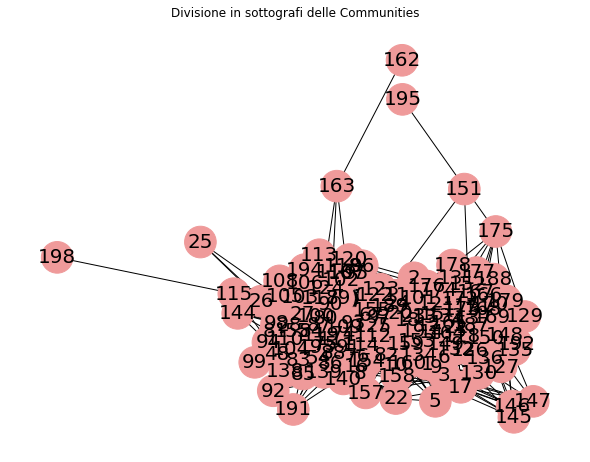

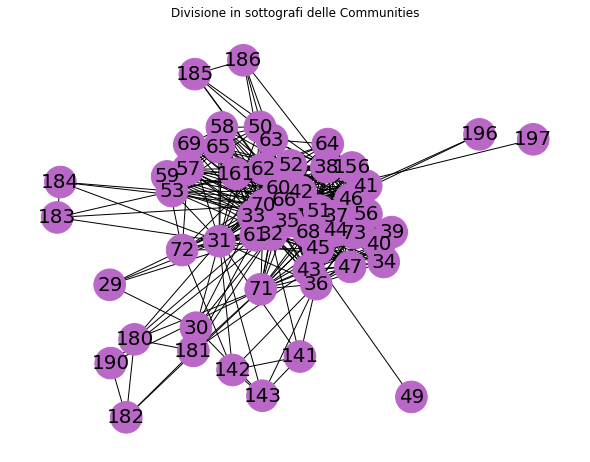

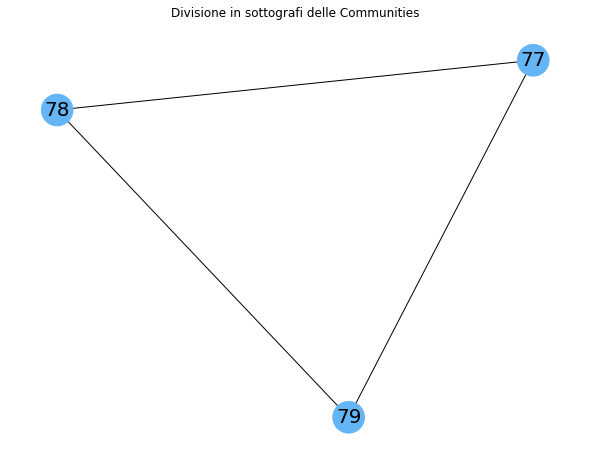

In [ ]:
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784", "#FFF176", "#BDBDBD"]
for i in range(len(label_prop_communities)):
    visualize_subgraph(G, label_prop_communities[i], colors[i])